In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
from io import StringIO
import scipy as misc
import sklearn

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression

import numpy as np
from io import StringIO
import io
from graphviz import Source
import collections


from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score


In [ ]:
def Fig_tree(tree, feature, path):
    f = io.stringIO()
    export_graphviz(tree, out_file=f, feature_names=featureclass)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams['figure.figsize'] = (30, 30)
    plt.imshow(img)

In [ ]:
data = pd.read_csv("Kaggle_train.csv",header=0,encoding = "ISO-8859-1") 

In [ ]:
humandata  = pd.read_csv("human_accounts_split.csv",encoding = "ISO-8859-1") 

In [ ]:
botdata = pd.read_csv("testreal_split.csv",encoding = "ISO-8859-1")

In [ ]:
botdata2 = pd.read_csv("bot_account_split.csv",encoding = "ISO-8859-1")

In [ ]:
traindata  = pd.read_csv("test_split.csv",encoding = "ISO-8859-1") 

In [ ]:
traindata["bot"] = pd.to_numeric(traindata["bot"])


In [ ]:
corr = traindata.corr()
corr.style.background_gradient(cmap='tab20c').set_properties(**{'font-size': '0pt'})


In [ ]:
bot_Y = traindata[traindata['bot']==1]['statuses_count']
bot_N = traindata[traindata['bot']==0]['statuses_count']

fig = plt.figure(figsize=(8, 8))
plt.title("TEST")

bot_Y.hist(alpha = 0.7, label="Bots")
bot_N.hist(alpha = 0.7, label="Human")
plt.legend(loc="upper right")

In [ ]:
#bot_Y = data['statuses_count']
#bot_N = humandata['statuses_count']

#fig = plt.figure(figsize=(8, 8))
#plt.title("TEST")

#bot_Y.hist(alpha = 0.7, label="Bots")
#bot_N.hist(alpha = 0.7, label="Human")
#plt.legend(loc="upper right")

In [ ]:
traindata.describe()

In [ ]:
c = DecisionTreeClassifier(min_samples_split=100)

In [ ]:
#data['followers_count'] = data['followers_count'].str.extract('(\d+)', expand=False)
#data['friends_count'] = data['friends_count'].str.extract('(\d+)', expand=False)
#data['listedcount'] = data['listedcount'].str.extract('(\d+)', expand=False)
#data['favourites_count'] = data['favourites_count'].str.extract('(\d+)', expand=False)
#data['statuses_count'] = data['statuses_count'].str.extract('(\d+)', expand=False)

In [ ]:
#(traindata['default_profile'] == 'TRUE').astype(int)
#(traindata['verified'] == 'TRUE').astype(int)



In [ ]:
traindata = traindata.replace("TRUE", '1') 


In [ ]:
traindata = traindata.replace("FALSE", '0')


In [ ]:
traindata.head(5)

In [ ]:
featureclass = ["followers_count" , "friends_count" , "listed_count" , "favourites_count" , "statuses_count" , "default_profile" , "verified" ]

In [ ]:
train, test = train_test_split(traindata, test_size=0.15)

In [ ]:
X_train = traindata[featureclass] 
Y_train = traindata["bot"]

X_test  = test[featureclass] 
Y_test  = test["bot"] 


In [ ]:
X_train=X_train.fillna("")

In [ ]:
pd.isnull(X_train).sum() > 0

In [ ]:
btree = c.fit(X_train, Y_train)

In [ ]:
Y_pred = c.predict(X_test)

In [ ]:
Y_pred

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score = accuracy_score(Y_test, Y_pred) * 100

In [ ]:
print("Accuracy:", round(score, 1), "%")

Avg Accuracy = 90%

In [ ]:
print(classification_report(Y_test,Y_pred.round()))


In [ ]:
Fig_tree(btree, featureclass, "Bot_Tree_01.png") ##Outputs a .png to the conda dir 
# needs updated version of IO to run without error

In [ ]:
tree.export_graphviz(btree) # Image available in Model chapter of dissertation

In [ ]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(btree, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("tree.pdf") 


## Find the Output file in the directory of your envirnoment.
Image also available in dissertation

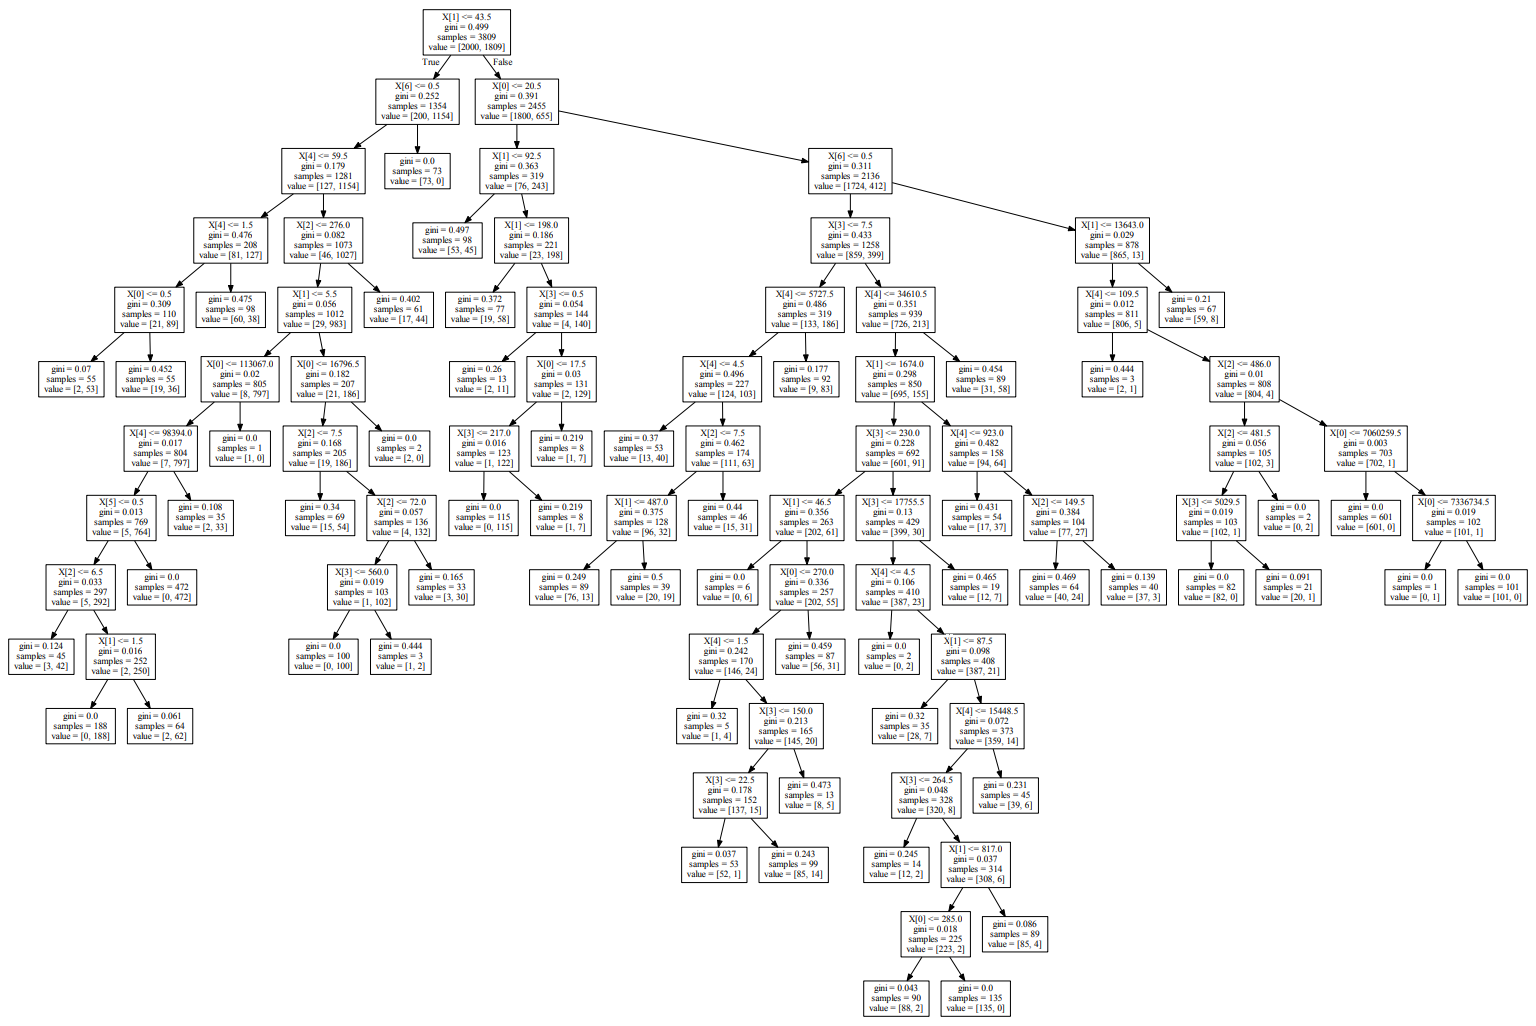

In [ ]:
data.head(2)


## Data Viz

In [ ]:
import altair as alt
alt.renderers.enable('notebook')

In [ ]:
source = data

nonbot = alt.Chart(source).mark_point().encode(
    y='followers_count',
    x='listedcount',
    color='bot:N',
    href='bot:N',
    tooltip=['bot:N', 'screen_name:N']
)

source2 = botdata

bot = alt.Chart(source2).mark_point().encode(
    y='followers_count',
    x='listedcount:Q',
    color='bot:N',
    href='bot:N',
    tooltip=['bot:N', 'screen_name:N']
)
nonbot | bot

In [ ]:
#source = data

#nonbot = alt.Chart(source).mark_point().encode(
#    alt.X('listed_count:Q', scale=alt.Scale(domain=(0,100000))),
#    alt.Y('friends_count',scale=alt.Scale(domain=(0,80000))),
#    color='bot:N',
#    href='bot:N',
#    tooltip=['bot:N', 'screen_name:N'],

#)
#nonbot

In [ ]:
source = botdata
bot = alt.Chart(source).mark_line(interpolate='step-after').encode(
    x='created_at:T',
    y='statuses_count'
)
bot

In [ ]:
source = botdata

bar = alt.Chart(source).mark_bar().encode(
    x='created_at:T',
    y='mean(followers_count):Q'
)



(bar).properties(width=900)

In [ ]:
source = botdata

alt.Chart(source).mark_bar().encode(
    y='statuses_count:Q',
    x="created_at:T"
).properties(height=250)

In [ ]:
source = data
statx = alt.Chart(source).mark_bar().encode(
    x='created_at:T',
    y='sum(statuses_count):Q',
    color='bot:N',
    column='verified:N'
)
statx

In [ ]:
source = data

alt.Chart(source).mark_circle().encode(
    alt.X("created_at:T" ),
    alt.Y("statuses_count:N", scale=alt.Scale(domain=(0, 2000000))),
    color="bot:N"
).properties(height=250)

In [ ]:
source = data
follow = alt.Chart(source).mark_point(size=20).encode(
    x="created_at:T",
    y="median(followers_count)",
    color="bot:N",
).properties(height=100)
follow

In [ ]:
collections.Counter(" ".join(botdata["lang"]).split()).most_common(20)



In [ ]:
humandata.describe()

In [ ]:
botdata2.describe()

In [ ]:
data = source
dfpro = alt.Chart(source, title='Default Account Types').mark_bar().encode(
    y='count()',
    x='default_profile',
    color='bot:N'

)
dfpro.encoding.x.title = 'Has Default Profile'
dfpro.encoding.y.title = 'Number Of Accounts'

data = source
dfproimg = alt.Chart(source, title='Default Profile Image').mark_bar().encode(
    y='count()',
    x='default_profile_image',
    color='bot:N'

)
dfproimg.encoding.x.title = 'Has Default Profile Image'
dfproimg.encoding.y.title = 'Number Of Accounts'

data = source
dfproexd = alt.Chart(source, title='Has Extended Profile').mark_bar().encode(
    y='count()',
    x='has_extended_profile',
    color='bot:N'

)
dfproexd.encoding.x.title = 'Has Extended Profile'
dfproexd.encoding.y.title = 'Number Of Accounts'






dfpro | dfproimg | dfproexd

In [ ]:
source = data

alt.Chart(source).mark_tick().encode(
    x='followers_count:Q',
    y='verified:O',
    color="bot:Q"
)

In [ ]:
source = data

alt.Chart(source).mark_bar().encode(
    x="created_at:T",
    y="statuses_count:Q",
    color="bot:N",
    row="bot:N",
    size='bot:N'

).properties(
    height=100
)

In [ ]:
data = source
datalang = alt.Chart(source, title='Language Of Accounts').mark_bar().encode(
    y='count()',
    x=alt.X('lang', sort=alt.EncodingSortField(field="lang", op="count", order='descending')),
    color=alt.Color('bot:N', scale=alt.Scale(scheme='dark2'),
))
datalang


In [ ]:
data = source
datalist = alt.Chart(source, title='Language Of Accounts').mark_bar().encode(
    y='count()',
    x=alt.X('location', sort=alt.EncodingSortField(field="lang", op="count", order='descending')),
    color=alt.Color('bot:N', scale=alt.Scale(scheme='dark2'),
))
datalist


In [ ]:
data = source
datalist = alt.Chart(source, title='Language Of Accounts').mark_bar().encode(
    y='count()',
    x=alt.X('url', sort=alt.EncodingSortField(field="url", op="count", order='descending')),
    color=alt.Color('bot:N', scale=alt.Scale(scheme='dark2'),
))
datalist


In [ ]:
data.head()

In [ ]:
data['description'] = data['description'].str.lower()

In [ ]:
data['description']

In [ ]:
source = humandata
datalist = alt.Chart(source, title='Human Desc').mark_line().encode(
    y='count()',
    x=alt.X('description', sort=alt.EncodingSortField(field="url", op="count", order='descending')
))
datalist


In [ ]:
source = botdata2
datalist3 = alt.Chart(source, title='Bot Desc').mark_line().encode(
    y='count()',
    x=alt.X('description', sort=alt.EncodingSortField(field="url", op="count", order='descending')
))
datalist3

source = humandata
datalist2 = alt.Chart(source, title='Human Desc').mark_line().encode(
    y='count()',
    x=alt.X('description', sort=alt.EncodingSortField(field="url", op="count", order='descending')
))
datalist2 | datalist3


In [ ]:
source = botdata2
datalist3 = alt.Chart(source, title='Bot Desc').mark_bar().encode(
    y='count()',
    x=alt.X('status', sort=alt.EncodingSortField(field="url", op="count", order='descending')
))
datalist3

source = humandata
datalist2 = alt.Chart(source, title='Human Desc').mark_bar().encode(
    y='count()',
    x=alt.X('status', sort=alt.EncodingSortField(field="url", op="count", order='descending')
))
datalist2 & datalist3

## Random Forest

In [ ]:
y = traindata.pop("bot")

In [ ]:
traindata.fillna('0')

In [ ]:
fmodel = RandomForestRegressor(n_estimators=2000, oob_score=True, n_jobs=-1, min_samples_leaf=5, random_state=100)

In [ ]:
np.nan_to_num(traindata)

In [ ]:
featureclass = ["followers_count" , "friends_count" , "listed_count" , "favourites_count" , "statuses_count" , "default_profile" , "verified" ]

In [ ]:
fmodel.fit(traindata[featureclass], y)

In [ ]:
Acc = roc_auc_score(y, fmodel.oob_prediction_)
Acc = Acc *100
print("Accuracy",round(Acc,3),"%")

Average Accuracy = 97.9%

In [ ]:
print(classification_report(y, fmodel.oob_prediction_.round()))

## Linear Regression

In [ ]:
traindata  = pd.read_csv("test.csv",encoding = "ISO-8859-1") 

In [ ]:
featureclass = ["followers_count" , "friends_count" , "listed_count" , "favourites_count" , "statuses_count" , "default_profile" , "verified" ]

In [ ]:
np.nan_to_num(traindata)
traindata.fillna('0')

In [ ]:
y = traindata['bot']
X = traindata.drop(['bot'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

linearmodel = LogisticRegression(penalty ='l2', C=1)

In [ ]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [ ]:
train, test = train_test_split(traindata, test_size=0.15)

In [ ]:
linearmodel.fit(traindata[featureclass], y)

In [ ]:
print("Accuracy:", accuracy_score(y, linearmodel.predict(traindata[featureclass])))
print(classification_report(y, linearmodel.predict(traindata[featureclass])))

## KNN

In [ ]:

traindata  = pd.read_csv("test.csv",encoding = "ISO-8859-1") 
featureclass = ["followers_count" , "friends_count" , "listed_count" , "favourites_count" , "statuses_count" , "default_profile" , "verified" ]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn import neighbors

In [ ]:
from sklearn import preprocessing

In [ ]:
y = traindata['bot']
X = traindata.drop(['bot'], axis=1)

In [ ]:
clf = neighbors.KNeighborsClassifier()

In [ ]:
clf.fit(traindata[featureclass], y)

In [ ]:
print("Accuracy:", accuracy_score(y, clf.predict(traindata[featureclass])))
print(classification_report(y, clf.predict(traindata[featureclass])))